# 少样本区分奇特草莓

In [2]:
#数据增强
from keras.preprocessing.image import ImageDataGenerator
path = 'task2_data//labeled_data'
dst_path = 'task2_data//gen_data'
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.02,horizontal_flip=True,vertical_flip=True)
gen = datagen.flow_from_directory(path,target_size=(224,224),batch_size=2, save_to_dir = dst_path, save_prefix='gen',save_format='jpg')

for i in range(100):
    gen.next()

Found 12 images belonging to 1 classes.


In [3]:
#t图片加载
from keras.preprocessing.image import load_img, img_to_array
img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
print(type(img))

<class 'PIL.Image.Image'>


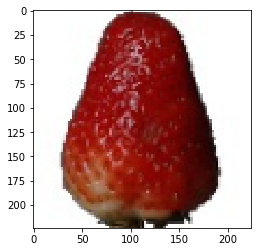

In [4]:
#可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.imshow(img)

In [5]:
#格式转化
img = img_to_array(img)
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(img.shape)

(224, 224, 3)


In [8]:
#维度转化与数据预处理
from keras.applications.vgg16 import preprocess_input
import numpy as np
img_p = np.expand_dims(img,axis=0)
print(img_p.shape)

(1, 224, 224, 3)


In [9]:
img_p = preprocess_input(img_p)

In [10]:
#VGG16提取特征
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet',include_top=False)
features = model_vgg16.predict(img_p)
print(features.shape,features)

(1, 7, 7, 512) [[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.         10.065598
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.      

In [11]:
#特征展开 flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


In [14]:
#批量图片的路径获取
import os
folder = 'task2_data//training_data'
files_name = os.listdir(folder)
# print(files_name)
img_path = []#用于存储图片路径
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['task2_data//training_data//1.jpg', 'task2_data//training_data//10.jpg', 'task2_data//training_data//100.jpg', 'task2_data//training_data//11.jpg', 'task2_data//training_data//12.jpg', 'task2_data//training_data//13.jpg', 'task2_data//training_data//137_100.jpg', 'task2_data//training_data//14.jpg', 'task2_data//training_data//143_100.jpg', 'task2_data//training_data//145_100.jpg', 'task2_data//training_data//148_100.jpg', 'task2_data//training_data//15.jpg', 'task2_data//training_data//150_100.jpg', 'task2_data//training_data//16.jpg', 'task2_data//training_data//17.jpg', 'task2_data//training_data//18.jpg', 'task2_data//training_data//19.jpg', 'task2_data//training_data//2.jpg', 'task2_data//training_data//20.jpg', 'task2_data//training_data//21.jpg', 'task2_data//training_data//3.jpg', 'task2_data//training_data//4.jpg', 'task2_data//training_data//5.jpg', 'task2_data//training_data//6.jpg', 'task2_data//training_data//7.jpg', 'task2_data//training_data//8.jpg', 'task2_data//traini

In [15]:
#VGG16特征提取方法的定义
def modelProcess(img_path,model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    img_p = np.expand_dims(img,axis=0)
    img_p = preprocess_input(img_p)
    img_vgg = model.predict(img_p)
    img_vgg = img_vgg.reshape(1,7*7*512)
    return img_vgg

In [18]:
#批量提取图片特征
features_train = np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    features_temp = modelProcess(img_path[i],model_vgg16)
    features_train[i] = features_temp
    print('preprocess:',img_path[i])

preprocess: task2_data//training_data//1.jpg
preprocess: task2_data//training_data//10.jpg
preprocess: task2_data//training_data//100.jpg
preprocess: task2_data//training_data//11.jpg
preprocess: task2_data//training_data//12.jpg
preprocess: task2_data//training_data//13.jpg
preprocess: task2_data//training_data//137_100.jpg
preprocess: task2_data//training_data//14.jpg
preprocess: task2_data//training_data//143_100.jpg
preprocess: task2_data//training_data//145_100.jpg
preprocess: task2_data//training_data//148_100.jpg
preprocess: task2_data//training_data//15.jpg
preprocess: task2_data//training_data//150_100.jpg
preprocess: task2_data//training_data//16.jpg
preprocess: task2_data//training_data//17.jpg
preprocess: task2_data//training_data//18.jpg
preprocess: task2_data//training_data//19.jpg
preprocess: task2_data//training_data//2.jpg
preprocess: task2_data//training_data//20.jpg
preprocess: task2_data//training_data//21.jpg
preprocess: task2_data//training_data//3.jpg
preprocess:

preprocess: task2_data//training_data//gen_5_2127577.jpg
preprocess: task2_data//training_data//gen_5_2664468.jpg
preprocess: task2_data//training_data//gen_5_271643.jpg
preprocess: task2_data//training_data//gen_5_275758.jpg
preprocess: task2_data//training_data//gen_5_3417282.jpg
preprocess: task2_data//training_data//gen_5_3572264.jpg
preprocess: task2_data//training_data//gen_5_4069151.jpg
preprocess: task2_data//training_data//gen_5_4928161.jpg
preprocess: task2_data//training_data//gen_5_6105878.jpg
preprocess: task2_data//training_data//gen_5_7253967.jpg
preprocess: task2_data//training_data//gen_5_8200100.jpg
preprocess: task2_data//training_data//gen_5_8472574.jpg
preprocess: task2_data//training_data//gen_5_9381975.jpg
preprocess: task2_data//training_data//gen_6_1403398.jpg
preprocess: task2_data//training_data//gen_6_2190437.jpg
preprocess: task2_data//training_data//gen_6_3210385.jpg
preprocess: task2_data//training_data//gen_6_4236644.jpg
preprocess: task2_data//training_

In [19]:
#样本数量与特征数
print(features_train.shape)

(240, 25088)


In [20]:
#X赋值
X = features_train
print(X.shape)

(240, 25088)


In [21]:
#kmeans模型聚类分析
from sklearn.cluster import KMeans
vgg_kmeans = KMeans(n_clusters=2,max_iter=3000)
#训练
vgg_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
#预测
y_predict_km = vgg_kmeans.predict(X)
print(y_predict_km)

[1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
#预测结果分布统计
import pandas as pd
print(pd.value_counts(y_predict_km))

1    121
0    119
dtype: int64


In [24]:
#普通草莓id
normal_strawberry_id = 1

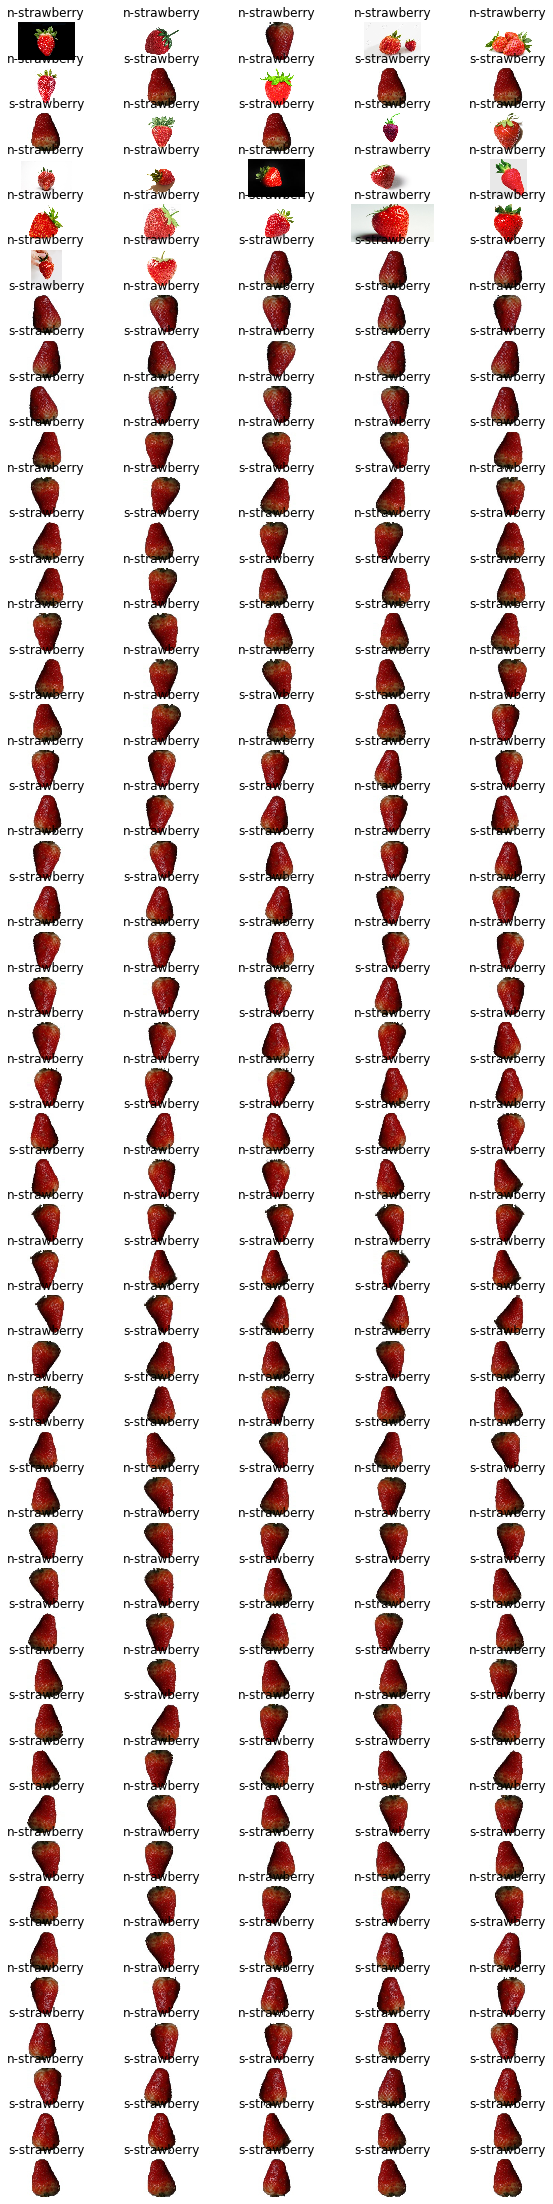

In [27]:
fig2 = plt.figure(figsize=(10,40))
for i in range(48):
    for j in range(5):
        img = load_img(img_path[i*5+j])
        plt.subplot(48,5,i*5+j+1)
        plt.title('n-strawberry' if y_predict_km[i*5+j]==normal_strawberry_id else 's-strawberry')
        plt.imshow(img)
        plt.axis('off')

In [28]:
#批量图片的路径获取
import os
folder = 'task2_data//test_data'
files_name = os.listdir(folder)
# print(files_name)
img_path = []#用于存储图片路径
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['task2_data//test_data//1.jpg', 'task2_data//test_data//2.jpg', 'task2_data//test_data//3.jpg', 'task2_data//test_data//4.jpg', 'task2_data//test_data//5.jpg', 'task2_data//test_data//6.jpg', 'task2_data//test_data//gen_0_5413230.jpg', 'task2_data//test_data//gen_0_5728814.jpg', 'task2_data//test_data//gen_0_7967246.jpg', 'task2_data//test_data//gen_0_8162928.jpg', 'task2_data//test_data//gen_0_8646347.jpg', 'task2_data//test_data//gen_1_9782.jpg']


In [29]:
#批量提取图片特征
features_test = np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    features_temp = modelProcess(img_path[i],model_vgg16)
    features_test[i] = features_temp
    print('preprocess:',img_path[i])

preprocess: task2_data//test_data//1.jpg
preprocess: task2_data//test_data//2.jpg
preprocess: task2_data//test_data//3.jpg
preprocess: task2_data//test_data//4.jpg
preprocess: task2_data//test_data//5.jpg
preprocess: task2_data//test_data//6.jpg
preprocess: task2_data//test_data//gen_0_5413230.jpg
preprocess: task2_data//test_data//gen_0_5728814.jpg
preprocess: task2_data//test_data//gen_0_7967246.jpg
preprocess: task2_data//test_data//gen_0_8162928.jpg
preprocess: task2_data//test_data//gen_0_8646347.jpg
preprocess: task2_data//test_data//gen_1_9782.jpg


In [30]:
#X_test
X_test = features_test
print(X_test.shape)

(12, 25088)


In [31]:
#测试数据预测
y_predict_km_test = vgg_kmeans.predict(X_test)
print(y_predict_km_test)

[1 1 1 1 1 1 1 0 1 1 1 1]


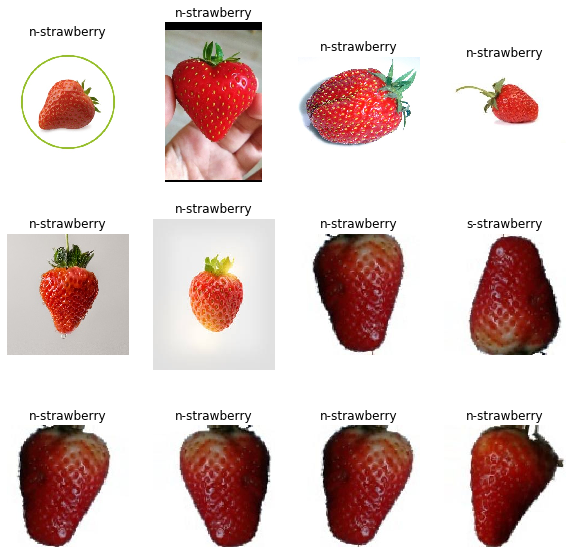

In [32]:
fig2 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path[i*4+j])
        plt.subplot(3,4,i*4+j+1)
        plt.title('n-strawberry' if y_predict_km_test[i*4+j]==normal_strawberry_id else 's-strawberry')
        plt.imshow(img)
        plt.axis('off')

In [34]:
#meanshift模型替代kmeans模型
from sklearn.cluster import MeanShift, estimate_bandwidth
#获取合适的meanshift半径
bw = estimate_bandwidth(X,n_samples=150)
print(bw)

1519.0444035529688


In [35]:
vgg_ms = MeanShift(bandwidth=bw)
#模型训练
vgg_ms.fit(X)

MeanShift(bandwidth=1519.0444035529688, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [36]:
#预测
y_predict_ms = vgg_ms.predict(X)
print(y_predict_ms)

[ 2  0  0  1 12 13  0 14  0  0  0  0  0  9  0  5  8  3  7  0  6  0 11 10
 15  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [37]:
#预测结果分布统计
print(pd.value_counts(y_predict_ms))

0     225
15      1
14      1
13      1
12      1
11      1
10      1
9       1
8       1
7       1
6       1
5       1
4       1
3       1
2       1
1       1
dtype: int64


In [38]:
#普通草莓id
normal_strawberry_id = 0

In [40]:
#批量图片的路径获取
import os
folder = 'task2_data//training_data'
files_name = os.listdir(folder)
# print(files_name)
img_path = []#用于存储图片路径
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['task2_data//training_data//1.jpg', 'task2_data//training_data//10.jpg', 'task2_data//training_data//100.jpg', 'task2_data//training_data//11.jpg', 'task2_data//training_data//12.jpg', 'task2_data//training_data//13.jpg', 'task2_data//training_data//137_100.jpg', 'task2_data//training_data//14.jpg', 'task2_data//training_data//143_100.jpg', 'task2_data//training_data//145_100.jpg', 'task2_data//training_data//148_100.jpg', 'task2_data//training_data//15.jpg', 'task2_data//training_data//150_100.jpg', 'task2_data//training_data//16.jpg', 'task2_data//training_data//17.jpg', 'task2_data//training_data//18.jpg', 'task2_data//training_data//19.jpg', 'task2_data//training_data//2.jpg', 'task2_data//training_data//20.jpg', 'task2_data//training_data//21.jpg', 'task2_data//training_data//3.jpg', 'task2_data//training_data//4.jpg', 'task2_data//training_data//5.jpg', 'task2_data//training_data//6.jpg', 'task2_data//training_data//7.jpg', 'task2_data//training_data//8.jpg', 'task2_data//traini

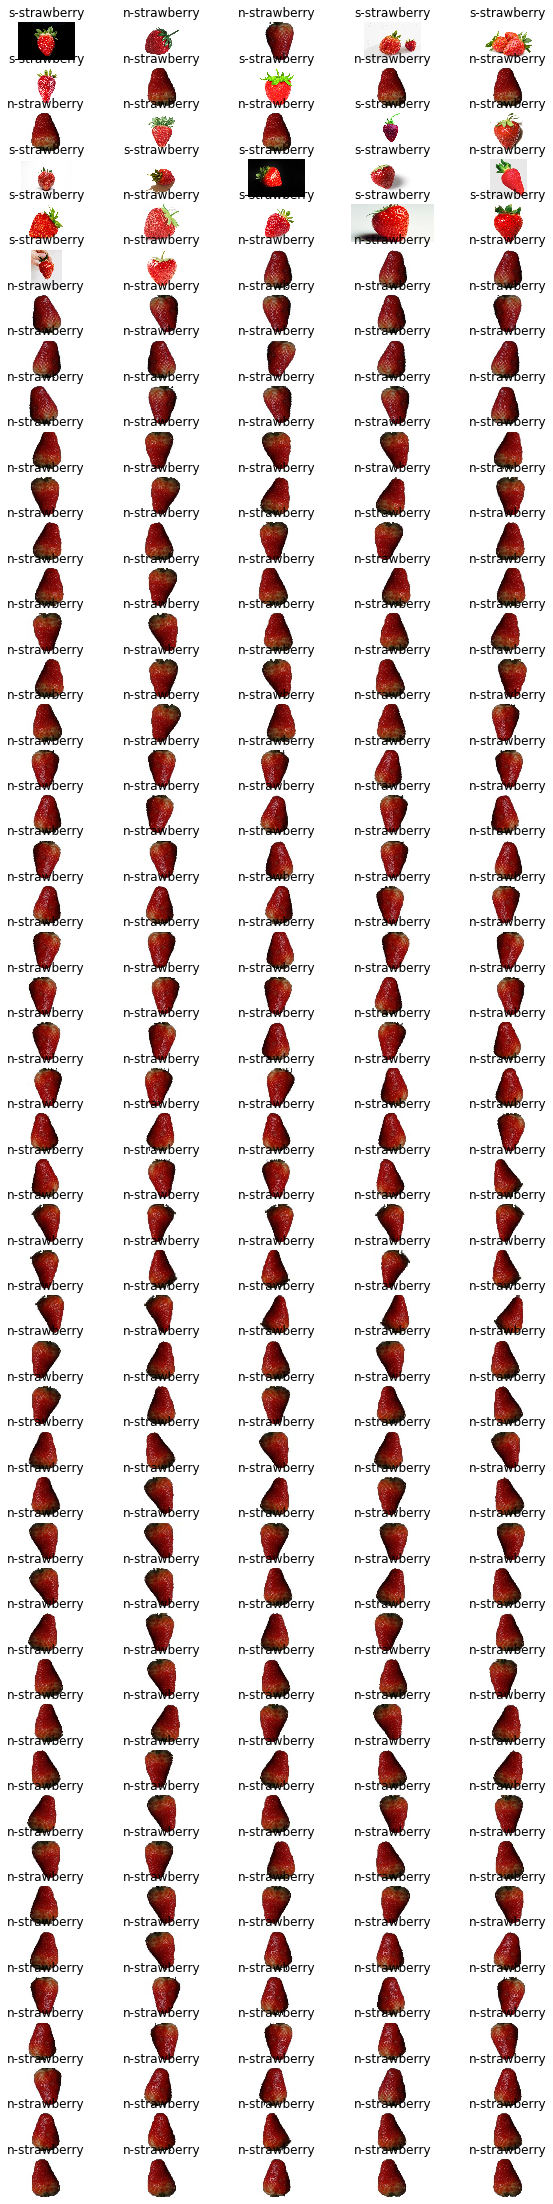

In [41]:
fig3 = plt.figure(figsize=(10,40))
for i in range(48):
    for j in range(5):
        img = load_img(img_path[i*5+j])
        plt.subplot(48,5,i*5+j+1)
        plt.title('n-strawberry' if y_predict_ms[i*5+j]==normal_strawberry_id else 's-strawberry')
        plt.imshow(img)
        plt.axis('off')

In [42]:
#批量图片的路径获取
import os
folder = 'task2_data//test_data'
files_name = os.listdir(folder)
# print(files_name)
img_path = []#用于存储图片路径
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['task2_data//test_data//1.jpg', 'task2_data//test_data//2.jpg', 'task2_data//test_data//3.jpg', 'task2_data//test_data//4.jpg', 'task2_data//test_data//5.jpg', 'task2_data//test_data//6.jpg', 'task2_data//test_data//gen_0_5413230.jpg', 'task2_data//test_data//gen_0_5728814.jpg', 'task2_data//test_data//gen_0_7967246.jpg', 'task2_data//test_data//gen_0_8162928.jpg', 'task2_data//test_data//gen_0_8646347.jpg', 'task2_data//test_data//gen_1_9782.jpg']


In [43]:
#测试数据预测
y_predict_ms_test = vgg_ms.predict(X_test)
print(y_predict_ms_test)

[0 0 0 8 4 5 0 0 0 0 0 0]


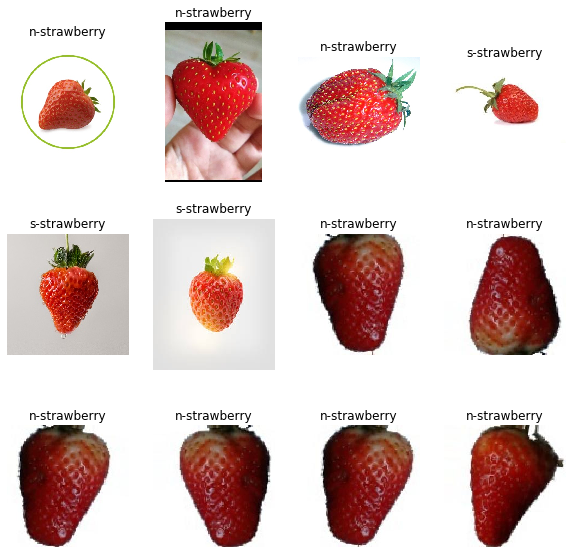

In [44]:
fig2 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path[i*4+j])
        plt.subplot(3,4,i*4+j+1)
        plt.title('n-strawberry' if y_predict_ms_test[i*4+j]==normal_strawberry_id else 's-strawberry')
        plt.imshow(img)
        plt.axis('off')

In [45]:
#PCA主成分分析
from sklearn.preprocessing import StandardScaler
standards = StandardScaler()
X_standard = standards.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_standard)

In [46]:
#维度确认
print(X.shape,X_pca.shape)

(240, 25088) (240, 200)


In [47]:
#计算降维后的方差比例
var_ratio = pca.explained_variance_ratio_
print(np.sum(var_ratio))

0.9762284754366153


In [48]:
#创建第二个ms模型
#获取ms的半径
bw_2 = estimate_bandwidth(X_pca,n_samples=150)
print(bw_2)

167.27686995372952


In [49]:
vgg_pca_ms = MeanShift(bandwidth=bw_2)
vgg_pca_ms.fit(X_pca)

MeanShift(bandwidth=167.27686995372952, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [50]:
#模型预测
y_predict_pca_ms = vgg_pca_ms.predict(X_pca)
print(y_predict_pca_ms)

[21 10  0  9  6 27  0 17  0  0  0 18  0 16 22 13 12 11 15 14  7  8  0 20
 23 24 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0 25  0  0  3
  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 26  0  4  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]


In [51]:
print(pd.value_counts(y_predict_pca_ms))

0     213
26      1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
27      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
13      1
dtype: int64


In [53]:
#普通草莓id
normal_strawberry_id = 0

In [54]:
#批量图片的路径获取
import os
folder = 'task2_data//training_data'
files_name = os.listdir(folder)
# print(files_name)
img_path = []#用于存储图片路径
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['task2_data//training_data//1.jpg', 'task2_data//training_data//10.jpg', 'task2_data//training_data//100.jpg', 'task2_data//training_data//11.jpg', 'task2_data//training_data//12.jpg', 'task2_data//training_data//13.jpg', 'task2_data//training_data//137_100.jpg', 'task2_data//training_data//14.jpg', 'task2_data//training_data//143_100.jpg', 'task2_data//training_data//145_100.jpg', 'task2_data//training_data//148_100.jpg', 'task2_data//training_data//15.jpg', 'task2_data//training_data//150_100.jpg', 'task2_data//training_data//16.jpg', 'task2_data//training_data//17.jpg', 'task2_data//training_data//18.jpg', 'task2_data//training_data//19.jpg', 'task2_data//training_data//2.jpg', 'task2_data//training_data//20.jpg', 'task2_data//training_data//21.jpg', 'task2_data//training_data//3.jpg', 'task2_data//training_data//4.jpg', 'task2_data//training_data//5.jpg', 'task2_data//training_data//6.jpg', 'task2_data//training_data//7.jpg', 'task2_data//training_data//8.jpg', 'task2_data//traini

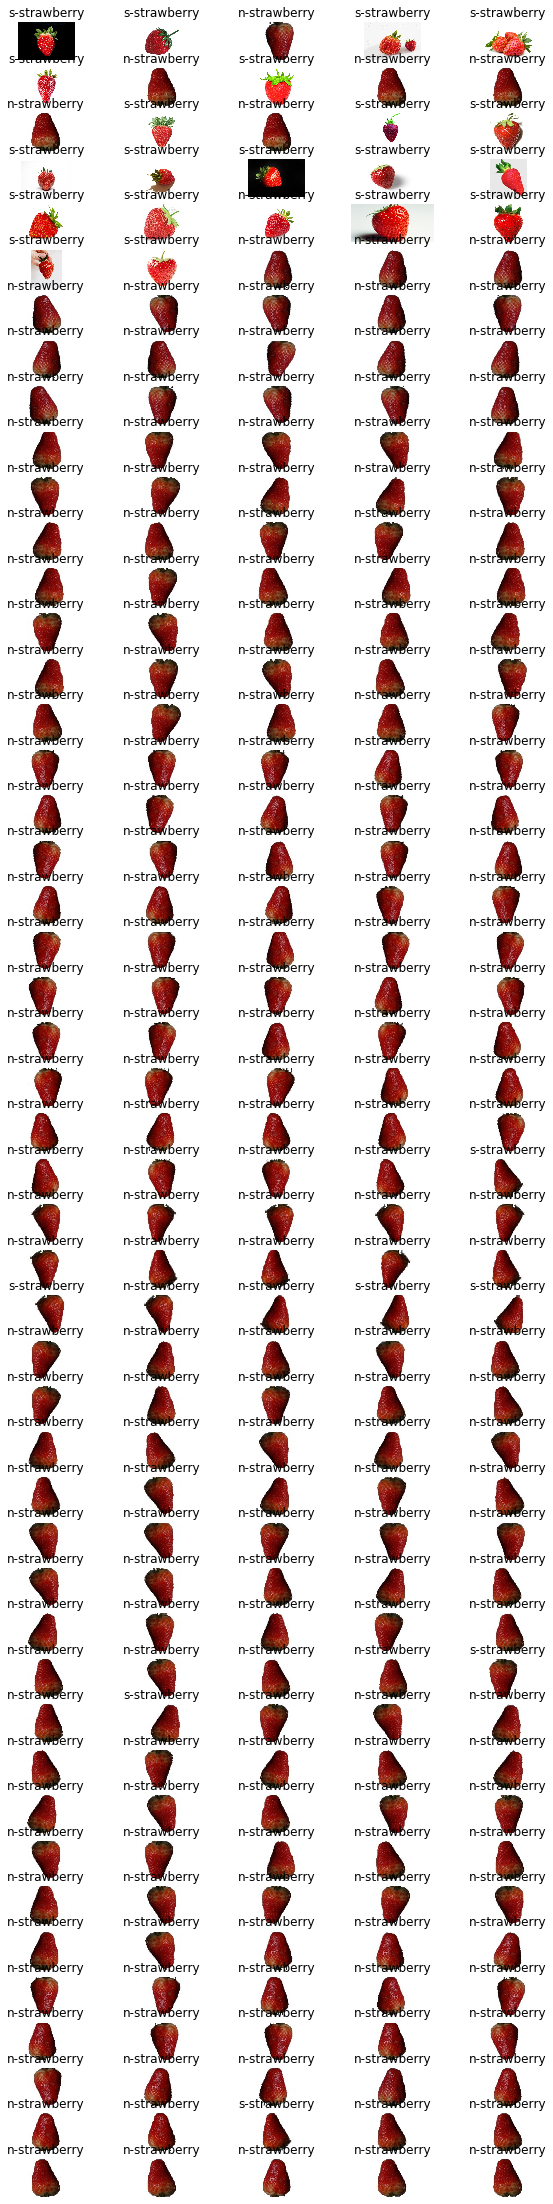

In [55]:
fig3 = plt.figure(figsize=(10,40))
for i in range(48):
    for j in range(5):
        img = load_img(img_path[i*5+j])
        plt.subplot(48,5,i*5+j+1)
        plt.title('n-strawberry' if y_predict_pca_ms[i*5+j]==normal_strawberry_id else 's-strawberry')
        plt.imshow(img)
        plt.axis('off')

In [56]:
#批量图片的路径获取
import os
folder = 'task2_data//test_data'
files_name = os.listdir(folder)
# print(files_name)
img_path = []#用于存储图片路径
for i in files_name:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path = [folder + '//' + i for i in img_path]
print(img_path)

['task2_data//test_data//1.jpg', 'task2_data//test_data//2.jpg', 'task2_data//test_data//3.jpg', 'task2_data//test_data//4.jpg', 'task2_data//test_data//5.jpg', 'task2_data//test_data//6.jpg', 'task2_data//test_data//gen_0_5413230.jpg', 'task2_data//test_data//gen_0_5728814.jpg', 'task2_data//test_data//gen_0_7967246.jpg', 'task2_data//test_data//gen_0_8162928.jpg', 'task2_data//test_data//gen_0_8646347.jpg', 'task2_data//test_data//gen_1_9782.jpg']


In [58]:
X_test_standard = standards.transform(X_test)
#测试数据pca降维
X_test_pca = pca.transform(X_test_standard)
print(X_test.shape,X_test_pca.shape)

(12, 25088) (12, 200)


In [59]:
#测试数据预测
y_predict_pca_ms_test = vgg_pca_ms.predict(X_test_pca)
print(y_predict_pca_ms_test)

[ 6 20  7  0 10 20  0  0  0  0  0  0]


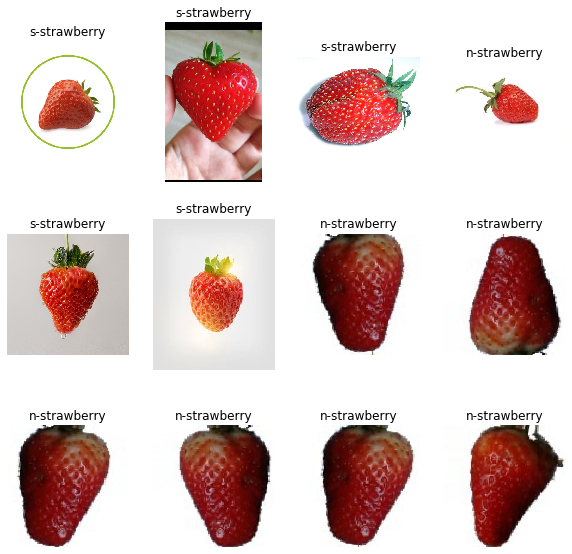

In [60]:
fig2 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path[i*4+j])
        plt.subplot(3,4,i*4+j+1)
        plt.title('n-strawberry' if y_predict_pca_ms_test[i*4+j]==normal_strawberry_id else 's-strawberry')
        plt.imshow(img)
        plt.axis('off')